In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

In [4]:
file = 'case1.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Заказы', 'Коробки по заказам', 'Агрегация', 'Агрегация (города)', 'Основные', 'Карманы', 'Квартили', 'Гистограмма', 'Процентили']


In [5]:
df1 = xl.parse('Заказы')
df1.head()

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург


In [6]:
df1[df1['День'] == 1].sum()

Номер заказа                                                       9113
Вес груза                                                       20877.6
День                                                                 19
Количество коробок                                                 2791
Город отправки        ТаллинРигаМоскваТаллинВильнюсРигаРигаХельсинки...
Город доставки        Санкт-ПетербургСанкт-ПетербургРигаСанкт-Петерб...
dtype: object

In [7]:
df1[df1['День'] == 2].sum()

Номер заказа                                                      35207
Вес груза                                                       60484.6
День                                                                106
Количество коробок                                                 7993
Город отправки        ХельсинкиМоскваРигаМоскваВильнюсТаллинМоскваМо...
Город доставки        Санкт-ПетербургХельсинкиСанкт-ПетербургРигаСан...
dtype: object

In [8]:
df1[df1['День'].isin(['1'])]

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург
5,184,1110.26,1,154,Рига,Санкт-Петербург
6,194,1030.81,1,140,Рига,Санкт-Петербург
7,277,1093.69,1,139,Хельсинки,Санкт-Петербург
8,473,1025.65,1,129,Таллин,Санкт-Петербург
9,586,1001.96,1,140,Хельсинки,Москва


In [9]:
df1[df1['День'].isin(['2'])]

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
19,63,939.66,2,133,Хельсинки,Санкт-Петербург
20,137,1349.35,2,166,Москва,Хельсинки
21,145,1007.46,2,138,Рига,Санкт-Петербург
22,148,1280.92,2,166,Москва,Рига
23,173,1357.04,2,173,Вильнюс,Санкт-Петербург
24,187,1141.97,2,157,Таллин,Санкт-Петербург
25,193,1264.86,2,160,Москва,Вильнюс
26,210,1093.07,2,151,Москва,Рига
27,251,1150.68,2,157,Вильнюс,Калининград
28,314,1119.55,2,150,Хельсинки,Калининград


In [10]:
df1.shape

(1300, 6)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Номер заказа        1300 non-null   int64  
 1   Вес груза           1300 non-null   float64
 2   День                1300 non-null   int64  
 3   Количество коробок  1300 non-null   int64  
 4   Город отправки      1300 non-null   object 
 5   Город доставки      1300 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 61.1+ KB


In [12]:
print('Медиана =', statistics.median(df1['Вес груза']))
print('Мода =', statistics.mode(df1['Вес груза']))
print('Мат ожидание =', statistics.mean(df1['Вес груза']))
print('Стандартное отклонение =', statistics.pstdev(df1['Вес груза']))
print('Дисперсия =', statistics.pvariance(df1['Вес груза']))
print('Минимум =', min(df1['Вес груза']))
print('Максимум =', max(df1['Вес груза']))
print('Размах =', max(df1['Вес груза']) - min(df1['Вес груза']))

Медиана = 1136.4499999999998
Мода = 1157.63
Мат ожидание = 1132.8550076923077
Стандартное отклонение = 91.80039069088944
Дисперсия = 8427.311730999942
Минимум = 823.52
Максимум = 1375.52
Размах = 552.0


In [13]:
df1.quantile([.10, .25, .50, .75], axis = 0) 

,Номер заказа,Вес груза,День,Количество коробок
0.10,130.90,1011.206,4.0,138.0
0.25,325.75,1067.890,8.0,144.0
0.50,650.50,1136.450,15.0,151.0
0.75,975.25,1195.805,23.0,158.0


In [14]:
df1.describe()

,Номер заказа,Вес груза,День,Количество коробок
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,1132.855008,15.736154,150.870769
std,375.421985,91.835719,8.634771,10.197823
min,1.000000,823.520000,1.000000,113.000000
25%,325.750000,1067.890000,8.000000,144.000000
50%,650.500000,1136.450000,15.000000,151.000000
75%,975.250000,1195.805000,23.000000,158.000000
max,1300.000000,1375.520000,30.000000,182.000000


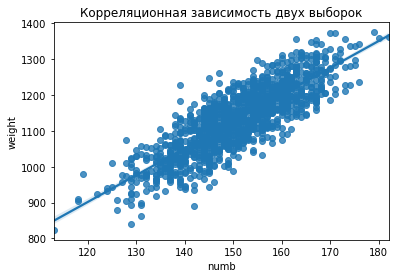

Коэффициент Пирсона = 0.8325170657126875


In [15]:
numb = df1['Количество коробок']
weight = df1['Вес груза']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = numb, y = weight, data=df1, fit_reg=True)
plt.xlabel('numb')
plt.ylabel('weight')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()
corr = numb.corr(weight)
print('Коэффициент Пирсона =', corr)

Видим зависимость между весом груза и количеством коробок

(array([  3.,  18.,  70., 138., 210., 312., 284., 170.,  77.,  18.]),
 array([ 823.52,  878.72,  933.92,  989.12, 1044.32, 1099.52, 1154.72,
        1209.92, 1265.12, 1320.32, 1375.52]),
 <BarContainer object of 10 artists>)

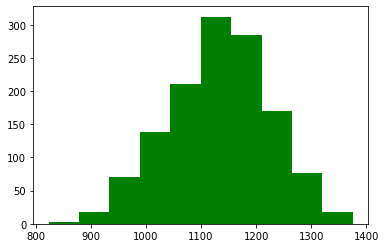

In [16]:
data = df1[df1['Количество коробок'] <= 150]
plt.hist(df1['Вес груза'], facecolor='g')


(array([  3.,  18.,  70., 138., 210., 312., 284., 170.,  77.,  18.]),
 array([ 823.52,  878.72,  933.92,  989.12, 1044.32, 1099.52, 1154.72,
        1209.92, 1265.12, 1320.32, 1375.52]),
 <BarContainer object of 10 artists>)

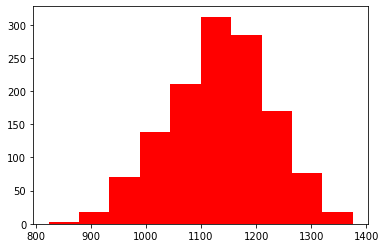

In [17]:
data1 = df1[df1['Количество коробок'] > 150]
plt.hist(df1['Вес груза'], facecolor='r')

Нормальное распределение данных

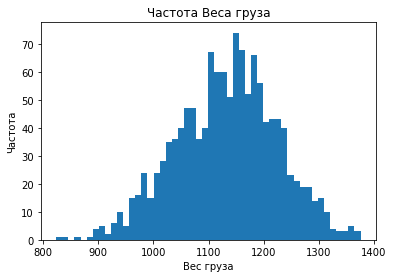

In [18]:
plt.hist(df1['Вес груза'], 50)
plt.title('Частота Веса груза')
plt.xlabel('Вес груза')
plt.ylabel('Частота')

plt.show()

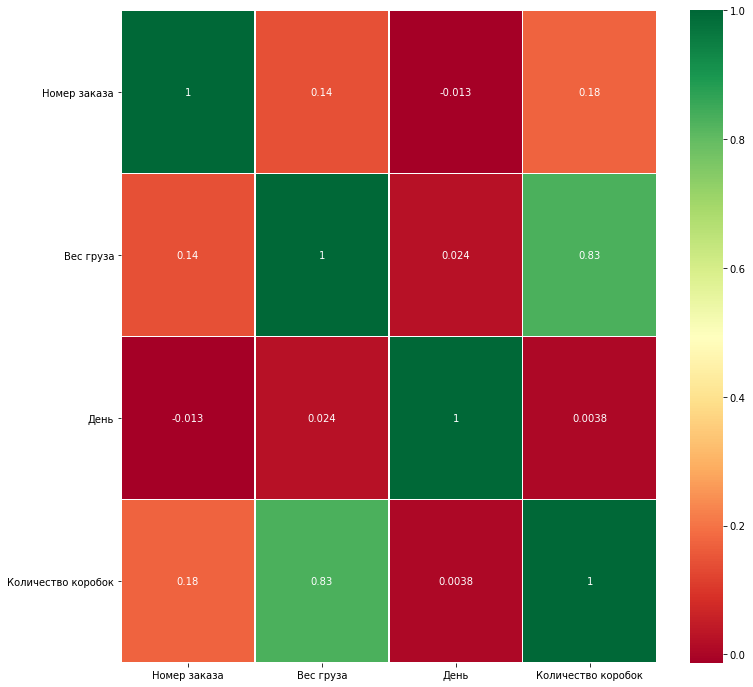

In [19]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Посчитаем критерий t для двух выборок: День 1 и День 2 (по критерию Вес груза). В данном случае сравниваем p-value.

In [20]:
small_1 = df1[df1['День'] == 1]['Вес груза']
small_2 = df1[df1['День'] == 2]['Вес груза']

print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=-1.4308992054350325, pvalue=0.15690836471758765)


t-value = -1.4, p-value = 0.15. Отрицательное значение t-value говорит о том, что средние значения выборов разные

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


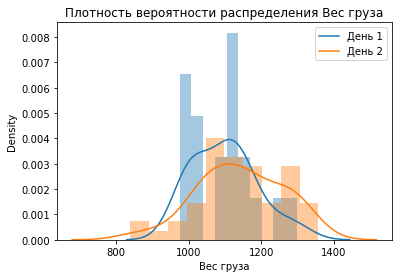

In [21]:
sns.distplot(small_1, 10)
sns.distplot(small_2, 10)
plt.title('Плотность вероятности распределения Вес груза')
plt.legend(['День 1', 'День 2'])
plt.show()

Разделим данные Количество Коробок на 2 части 140> и <140 и узнаем сможет ли автомобиль грузоподъемностью 1.2 тонны перевезти 140 коробок

In [22]:
small_3 = df1[df1['Количество коробок'] >= 140]['Вес груза']
small_4 = df1[df1['Количество коробок'] < 140]['Вес груза']

print(stats.ttest_ind(small_3, small_4))

Ttest_indResult(statistic=23.797880059808207, pvalue=3.530138801048771e-104)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


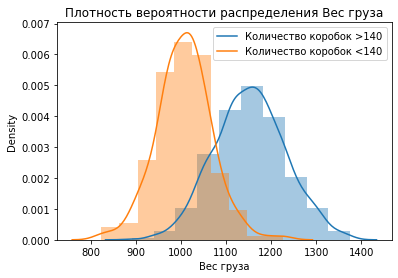

In [23]:
sns.distplot(small_3, 10)
sns.distplot(small_4, 10)
plt.title('Плотность вероятности распределения Вес груза')
plt.legend(['Количество коробок >140', 'Количество коробок <140'])
plt.show()

Видим, что автомобили с грузоподъемностью 1200 могут перевезти 140 коробок